# Web-Scraping-API-Integration

In [114]:
## Import libraries

import re
import pandas as pd
import requests
from bs4 import BeautifulSoup
import ssl

In [115]:
# Chekck the ssl certificate
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [116]:
# Read the HTML
top100_url = "https://www.gutenberg.org/browse/scores/top"
response = requests.get(top100_url)

In [117]:
# Check the status of request with function 

def check_status(r):
    if r.status_code == 200:
        print("success")
        return 1
    else:
        print("failed")
        return -1

check_status(response)

success


1

In [118]:
# Decode the respsonse 
contents = response.content.decode(response.encoding)

In [119]:
# Create a BeautifulSoup object
soup = BeautifulSoup(contents,'html.parser')

In [120]:
# Create a list for all the href tags
hrefList = []

In [121]:
# Find all the href tags and store in the hrefList. Print the first 30 of the list
for link in soup.find_all('a'):
    hrefList.append(link.get('href'))
    
hrefList[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

In [122]:
# Create a list for the book file number
bookId = []

In [123]:
# Hold the file no. over the range from 33-133

for i in range(33, 133):
    link = hrefList[i]
    link=link.strip()
    n = re.findall('[0-9]+',link)
    if len(n) == 1:
        bookId.append(int(n[0]))
    

In [146]:
# Print the soup object text for the first 2000
print(soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright How-To
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2023-07-28224074
last 7 days1501104
last 30 days5913305



Top 100 EBooks yesterday
T

In [125]:
# Find the name of top 100 books via the extracted text
# Create the list for the ebooks 
lst_titles = []

In [147]:
# Add the 100 books name to the list starting from the first book wtih loop
start_idx = soup.text.splitlines().index("Romeo and Juliet by William Shakespeare (2605)")

for i in range(100):
    lst_titles.append(soup.text.splitlines()[start_idx + i])


In [148]:
# Keep only the names of the books

lst_titles_new = []
for i in range(100):
    id1, id2 = re.match("^[a-zA-Z. {'}]*",lst_titles[i]).span()
    lst_titles_new.append(lst_titles[i][id1:id2])
    
# Print the book titles

for title in lst_titles_new:
    print(title)

Romeo and Juliet by William Shakespeare 
Moby Dick
A Room with a View by E. M.  Forster 
Middlemarch by George Eliot 
Little Women
The Complete Works of William Shakespeare by William Shakespeare 
The Blue Castle
The Enchanted April by Elizabeth Von Arnim 
Cranford by Elizabeth Cleghorn Gaskell 
The Adventures of Ferdinand Count Fathom 
The Expedition of Humphry Clinker by T.  Smollett 
The Adventures of Roderick Random by T.  Smollett 
Anna Karenina by graf Leo Tolstoy 
Twenty Years After by Alexandre Dumas 
History of Tom Jones
My Life 
Pride and Prejudice by Jane Austen 
Alice's Adventures in Wonderland by Lewis Carroll 
Dead letters by Maurice Baring 
The Count of Monte Cristo
Frankenstein
Richard the Lion Heart by Kate Norgate 
Oliver Ellis 
A Tale of Two Cities by Charles Dickens 
Dracula by Bram Stoker 
The Adventures of Sherlock Holmes by Arthur Conan Doyle 
The House of Egremont 
The Picture of Dorian Gray by Oscar Wilde 
The Report on Unidentified Flying Objects by Edward J. 

In [149]:
# import libraries 

import urllib.request, urllib.parse, urllib.error
import json
import os

In [150]:
# load the API key
with open('APIkeys.json') as f:
    keys = json.load(f)
    omdbapi = keys['OMDBapi']

In [151]:
# Create url and apikey
serviceurl = 'http://www.omdbapi.com/?'
apikey = "&apikey="+omdbapi

In [152]:
# Create function print_json for the movie data 

def print_json(json_data):
    list_keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    print("-"*50)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
    print("-"*50)

In [153]:
# Create function for downloading the poster of the movie     

def save_poster(json_data):
    title = json_data['Title']
    poster_url = json_data['Poster']
    # Splits the poster url by '.' and picks up the last string as file extension
    poster_file_extension=poster_url.split('.')[-1]
    # Reads the image file from web
    poster_data = urllib.request.urlopen(poster_url).read()
        
    savelocation=os.getcwd()+'\\'+'Posters'+'\\'
    # Creates new directory if the directory does not exist. Otherwise, just use the existing path.
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
    
    filename=savelocation+str(title)+'.'+poster_file_extension
    f=open(filename,'wb')
    f.write(poster_data)
    f.close()

In [154]:
# Create function for searching movie by its name 

def search_movie(title):
    try:
        url = serviceurl + urllib.parse.urlencode({'t': str(title)})+apikey
        print(f'Retrieving the data of "{title}" now... ')
        print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        
        if json_data['Response']=='True':
            print_json(json_data)
            # Asks user whether to download the poster of the movie
            if json_data['Poster']!='N/A':
                save_poster(json_data)
        else:
            print("Error encountered: ",json_data['Error'])
    
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")

In [155]:
# Test the function with the movie Titanic

search_movie("Titanic")

Retrieving the data of "Titanic" now... 
http://www.omdbapi.com/?t=Titanic&apikey=4c85585c
--------------------------------------------------
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: United States, Mexico
Awards: Won 11 Oscars. 126 wins & 83 nominations total
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '88%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.9
imdbVotes: 1,228,124
imdbID: tt0120338
--------------------------------------------------


In [156]:
# Test the function with "Random_error"

search_movie("Random_error")

Retrieving the data of "Random_error" now... 
http://www.omdbapi.com/?t=Random_error&apikey=4c85585c
Error encountered:  Movie not found!


# Exercise for API

In [167]:
# Using the weather.com api to pull the real time weahter data for the city portland 
# Import libraries

import requests
import json

In [168]:
# Define the API key and the city
api_key = 'b09ada1b5f684437b7b114444232907'
city = 'Portland'

In [169]:
# Define the base URL for the API
weather_url = f"http://api.weatherapi.com/v1/current.json?key={api_key}&q={city}"

In [170]:
# Make a GET request to the API
response = requests.get(weather_url)

# Parse the response as JSON
weather_data = response.json()

# Print the portland weather information
print(json.dumps(weather_data, indent=4))


{
    "location": {
        "name": "Portland",
        "region": "Oregon",
        "country": "United States of America",
        "lat": 45.52,
        "lon": -122.68,
        "tz_id": "America/Los_Angeles",
        "localtime_epoch": 1690635801,
        "localtime": "2023-07-29 6:03"
    },
    "current": {
        "last_updated_epoch": 1690635600,
        "last_updated": "2023-07-29 06:00",
        "temp_c": 16.1,
        "temp_f": 61.0,
        "is_day": 1,
        "condition": {
            "text": "Partly cloudy",
            "icon": "//cdn.weatherapi.com/weather/64x64/day/116.png",
            "code": 1003
        },
        "wind_mph": 5.6,
        "wind_kph": 9.0,
        "wind_degree": 320,
        "wind_dir": "NW",
        "pressure_mb": 1019.0,
        "pressure_in": 30.09,
        "precip_mm": 0.0,
        "precip_in": 0.0,
        "humidity": 72,
        "cloud": 25,
        "feelslike_c": 16.1,
        "feelslike_f": 61.0,
        "vis_km": 16.0,
        "vis_miles": 9.0

## Exercise for Visualization 


In [162]:
# Import libraries 
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
# load the data
netflix = pd.read_csv('netflix_user.csv')
netflix

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


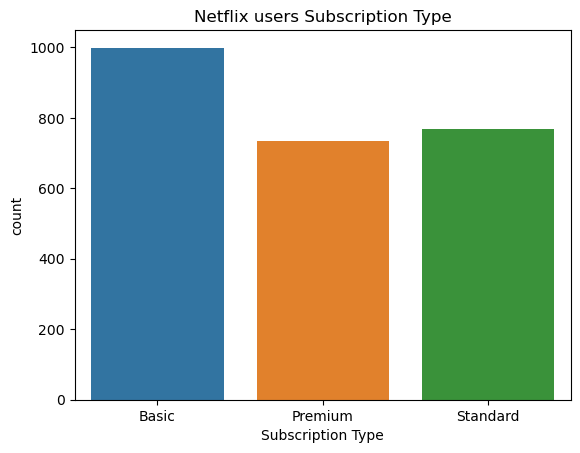

<Figure size 600x500 with 0 Axes>

In [164]:
# Bar Graph for the subscription Type 
sns.countplot(data=netflix,x='Subscription Type')
plt.title('Netflix users Subscription Type')
plt.figure(figsize=(6,5))
plt.show()

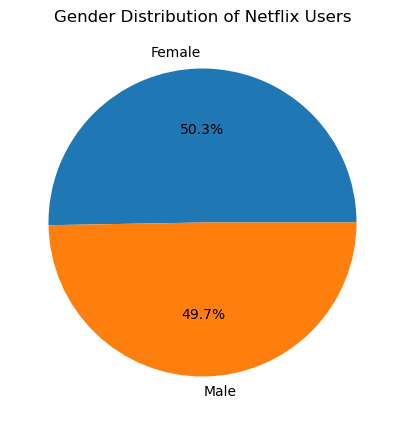

In [165]:
# Pie Chart for the Gender of the netflix users
gender = netflix["Gender"].value_counts()
plt.figure(figsize=(10,5))
plt.pie(gender, labels = gender.index, autopct='%1.1f%%')
plt.title('Gender Distribution of Netflix Users')
plt.show()

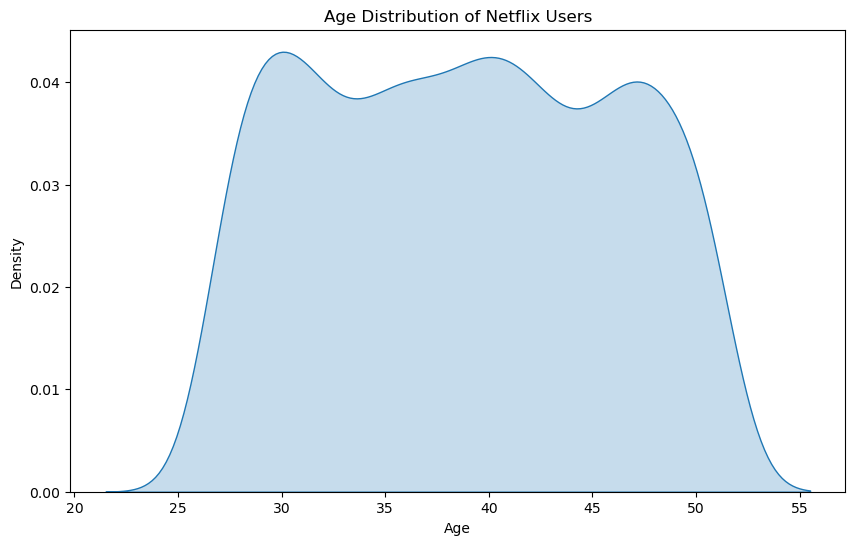

In [166]:
# Density Plot for the age of the netflix users
plt.figure(figsize=(10,6))
sns.kdeplot(netflix['Age'], fill=True)
plt.title('Age Distribution of Netflix Users')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()